In [82]:
from gensim import corpora, models
import codecs, os
from smart_open import smart_open
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
f = codecs.open('dict_gensim_736.txt', 'r', 'utf-8')
lines = f.readlines()
print (len(lines))

736


In [68]:
dictionary = corpora.Dictionary(line.lower().split() for line in smart_open('dict_gensim_736.txt', 'rb'))
dictionary.save(os.path.join('dict_736.dict'))  # store the dictionary, for future reference

In [69]:
# To actually convert tokenized documents to vectors:
corpus = [dictionary.doc2bow(text.split()) for text in lines]
corpora.MmCorpus.serialize(os.path.join('corp_736.mm'), corpus)

In [70]:
corp = corpora.MmCorpus(os.path.join('corp_736.mm'))
print(corp)

MmCorpus(736 documents, 83058 features, 1142418 non-zero entries)


In [71]:
%time ldamodel = models.ldamodel.LdaModel(corp, id2word=dictionary, num_topics=10, passes=20, alpha=1.25, eta=1.25)

Wall time: 10min 37s


In [72]:
# выводим топы слов
for index, topic in ldamodel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['проект', 'предлагать', 'мероприятие', 'информация', 'центр', 'полезный', 'страница', 'язык', 'история', 'детский', 'российский', 'реклама', 'помогать', 'развитие', 'сайт', 'подписываться', 'школа', 'организация', 'создавать', 'образование', 'правило', 'программа', 'телефон', 'материал', 'сочи', 'официальный', 'бизнес', 'являться', 'фотография', 'игра']
Topic: 1 
Words: ['молодежка', 'сериал', 'рейтинговый', 'стс', 'концертный', 'исполнять', 'futurehasnomercy', 'поклонник', 'badwaves', 'музыкант', 'интонация', 'гусли', 'наклейка', 'воронов', 'донецк', 'прозвучать', 'гиннесса', 'перец', 'таймслота', 'граммофон', 'провинциальный', 'целеустремленность', 'полтора', 'кумир', 'телепроект', 'label', 'памятный', 'вадим', 'эпизод', 'нрав']
Topic: 2 
Words: ['информация', 'проект', 'предлагать', 'детский', 'создавать', 'страница', 'мероприятие', 'событие', 'официальный', 'помогать', 'сайт', 'реклама', 'находить', 'школа', 'фотография', 'подписываться', 'развитие', 'центр', 'ком

In [73]:
# Вычисляем логарифм перплексии и немного преобразуем, чтобы привести к общепринятому виду
perplexity = ldamodel.log_perplexity(list(corp))
print (2**(-perplexity))
perp = ldamodel.bound(corp)
2**(-perp/float(87409))

483.5873414216391


1.1753186850941836e+73

In [75]:
# Получение распределения тем для конкретного документа
doc = list(corp)
ldamodel.get_document_topics(doc)
num_topics_used = [len(ldamodel[doc]) for doc in corpus]

Text(0.5,1,'Распределение по номерам тем для конкретного пользователя')

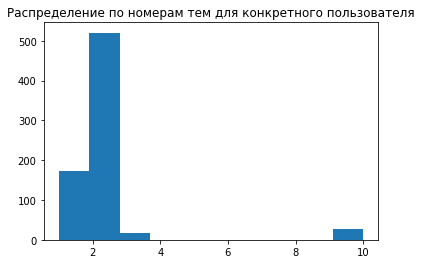

In [89]:
plt.hist(num_topics_used)
plt.title('Распределение по номерам тем для конкретного пользователя')